## AIDA Practical Quiz
By: Vallarta, Troy Joaquin G.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

source = "https://github.com/Zofserif/aida2-practice/blob/master/datasets/netflix_titles.xlsx?raw=true"

<h2> DATASET READING </h2>

In [15]:
## 1. Read the dataset in xls file.
df = pd.read_excel(source)

In [16]:
## Getting the categorical data
# df5_dummy = pd.get_dummies(df5['listed_in'])
# df5_dummy = pd.concat([df5, df5_dummy], axis =1)
# df5_dummy.drop(["listed_in"], inplace=True, axis=1)
# df5_dummy = df5_dummy.groupby(df5_dummy['show_id']).aggregate("sum")
# df5_dummy

In [17]:
## 2. Clean the data if not yet cleaned.
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

##### The data is not cleaned.... 

<h2> DATA CLEANING </h2>

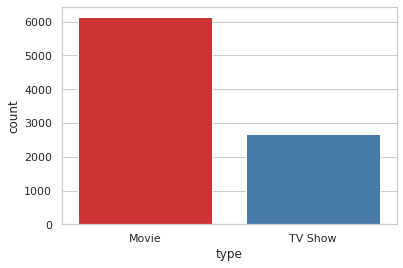

In [20]:
## 2. Clean the data if not yet cleaned.
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = pd.DatetimeIndex(df['date_added']).year
df['month_added'] = df['date_added'].dt.month
df=df.dropna(subset=['year_added'])
df['year_added']=df['year_added'].astype(int)

In [ ]:
sns.countplot(data = df , x =df['type'] ,palette='Set1' );

In [21]:
# netflix_df = df.copy()
# netflix_df = df.dropna(subset=['duration_minutes'])
# netflix_df.pop("duration_seasons")
# nonum = netflix_df[pd.to_numeric(netflix_df['duration_minutes'], errors='coerce').isna()].index
# netflix_df = netflix_df.drop(nonum)
# netflix_df = netflix_df.astype({'duration_minutes':'int'})
# netflix_df.dtypes

In [6]:
def val_missing(x):
  return sum(x.isnull())

#Applying per column:
print ("Missing values per column:")
print (netflix_df.apply(val_missing, axis=0)) 

#Applying per row:
print ("\nMissing values per row:")
print (netflix_df.apply(val_missing, axis=1).head(10)) 

Missing values per column:
duration_minutes    0
type                0
title               0
date_added          2
release_year        1
rating              9
description         1
show_id             2
dtype: int64

Missing values per row:
0     0
1     0
4     0
6     0
7     0
9     0
10    0
11    0
12    0
13    0
dtype: int64


In [7]:
## 3.  Create a python program that will show the descriptive analysis of the datasets ( Count, min, max, standard deviation, 75%,50%and 25%)
netflix_df.describe().iloc[:,[0,1]]

,duration_minutes,release_year
count,4265.000000,4264.000000
mean,99.100821,2012.370310
std,28.074857,9.679987
min,3.000000,1942.000000
25%,86.000000,2012.000000
50%,98.000000,2016.000000
75%,115.000000,2017.000000
max,312.000000,2020.000000
